# SENTIMENT ANALYSIS

# Importing Libraries

In [22]:
# Importing necessary libraries
import praw  # Reddit API wrapper
import pandas as pd  # Data manipulation library
import numpy as np  # Numerical operations library
import re  # Regular expression operations
from textblob import TextBlob  # Text processing library for sentiment analysis
from wordcloud import WordCloud, STOPWORDS  # Library for generating word clouds
import seaborn as sns  # Data visualization library
import matplotlib.pyplot as plt  # Plotting library

# Reddit API Authentication

In [23]:
# Reddit API authentication
user_agent = "eddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="NkR2_4ZvcUgome9qE8XvdQ",  # Reddit client ID
    client_secret="oMvK9a5zyB_V-npDHPfw09kD3U_3jg",  # Reddit client secret
    user_agent=user_agent  # User agent for Reddit API
)

# New rising topics on selected word

In [24]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("cisco").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Cisco Meraki New CW APs
1bt61vb
Fresh-Young-Chicken
1711983807.0
1
1.0
https://www.reddit.com/r/Cisco/comments/1bt61vb/cisco_meraki_new_cw_aps/
0


# Selecting headlines of subreddits on selected topic

In [25]:
eadlines = set()
for submission in reddit.subreddit("cisco").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

891


# Creating dataset

In [26]:
# Create a dataframe from the scrapped data 
cisco_df = pd.DataFrame(headlines)
cisco_df.head()

,0
0,Nexus N9k 9348GC-FX3
1,DB Replication Issue on CUCM Version 11.5.1.12900
2,Cant ping HSRP VIP when its failed over
3,issues using FQDN objects in FTD/FMC/FP
4,ZTNA firepower solution


In [27]:
cisco_df.columns

RangeIndex(start=0, stop=1, step=1)

In [28]:
cisco_df.columns = ['Titles']

In [29]:
cisco_df.head()

,Titles
0,Nexus N9k 9348GC-FX3
1,DB Replication Issue on CUCM Version 11.5.1.12900
2,Cant ping HSRP VIP when its failed over
3,issues using FQDN objects in FTD/FMC/FP
4,ZTNA firepower solution


In [30]:
cisco_df.Titles.duplicated().sum() 

0

# Cleaning headlines

In [31]:
#Cleaning the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
cisco_df["Titles"]= cisco_df["Titles"].apply(cleanTxt)

#Show the clean text
cisco_df.head()

,Titles
0,Nexus N9k 9348GC-FX3
1,DB Replication Issue on CUCM Version 11.5.1.12900
2,Cant ping HSRP VIP when its failed over
3,issues using FQDN objects in FTD/FMC/FP
4,ZTNA firepower solution


In [32]:
# Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
cisco_df["Titles"]= cisco_df["Titles"].apply(remove_emoji)

#Show the clean text
cisco_df.head()

,Titles
0,Nexus N9k 9348GC-FX3
1,DB Replication Issue on CUCM Version 11.5.1.12900
2,Cant ping HSRP VIP when its failed over
3,issues using FQDN objects in FTD/FMC/FP
4,ZTNA firepower solution


# Getting polarity and insight

In [33]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
cisco_df['Subjectivity'] = cisco_df['Titles'].apply(getSubjectivity)
cisco_df['Polarity'] = cisco_df['Titles'].apply(getPolarity)

#Now display data
cisco_df.head()

,Titles,Subjectivity,Polarity
0,Nexus N9k 9348GC-FX3,0.0,0.0
1,DB Replication Issue on CUCM Version 11.5.1.12900,0.0,0.0
2,Cant ping HSRP VIP when its failed over,0.3,-0.5
3,issues using FQDN objects in FTD/FMC/FP,0.0,0.0
4,ZTNA firepower solution,0.0,0.0


In [34]:
# Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
cisco_df["Insight"] = cisco_df["Polarity"].apply(getInsight)

cisco_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Nexus N9k 9348GC-FX3,0.000000,0.000000,Neutral
1,DB Replication Issue on CUCM Version 11.5.1.12900,0.000000,0.000000,Neutral
2,Cant ping HSRP VIP when its failed over,0.300000,-0.500000,Negative
3,issues using FQDN objects in FTD/FMC/FP,0.000000,0.000000,Neutral
4,ZTNA firepower solution,0.000000,0.000000,Neutral
5,ASA monitoring rule,0.000000,0.000000,Neutral
6,RSP-440-TR vs SE memory and routing tables.,0.000000,0.000000,Neutral
7,Issues configuring Cisco CBW140AC WAP,0.000000,0.000000,Neutral
8,Lead time check on gear,0.000000,0.000000,Neutral
9,Can failover pair of modern FPRs with ASA soft...,0.300000,0.200000,Positive


# Visualizing Sentiment Scores

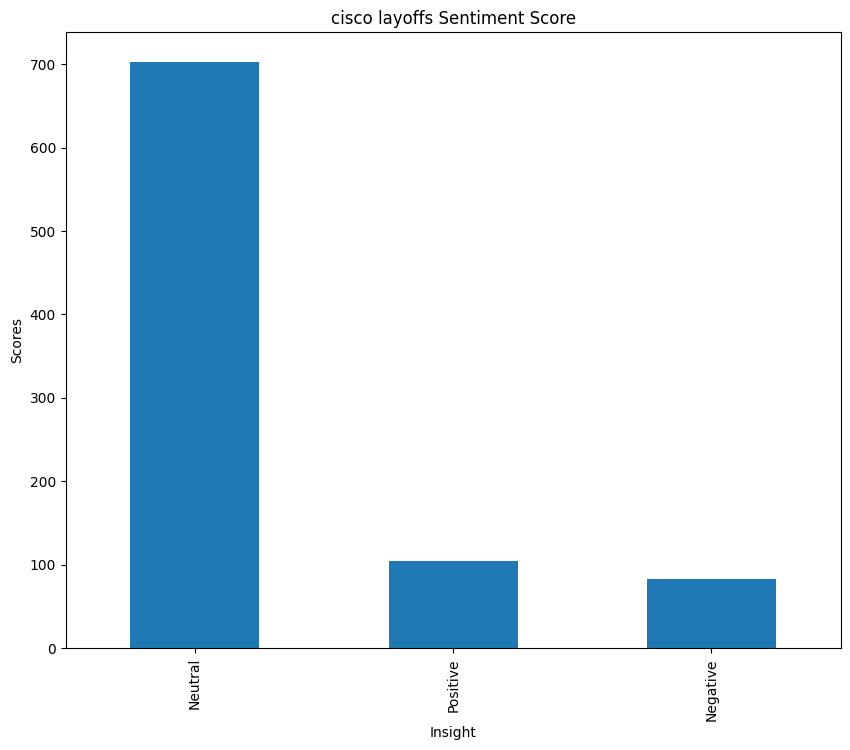

In [35]:
# Plot the values count of sentiment
plt.title("cisco layoffs Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
cisco_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Generating Word Cloud

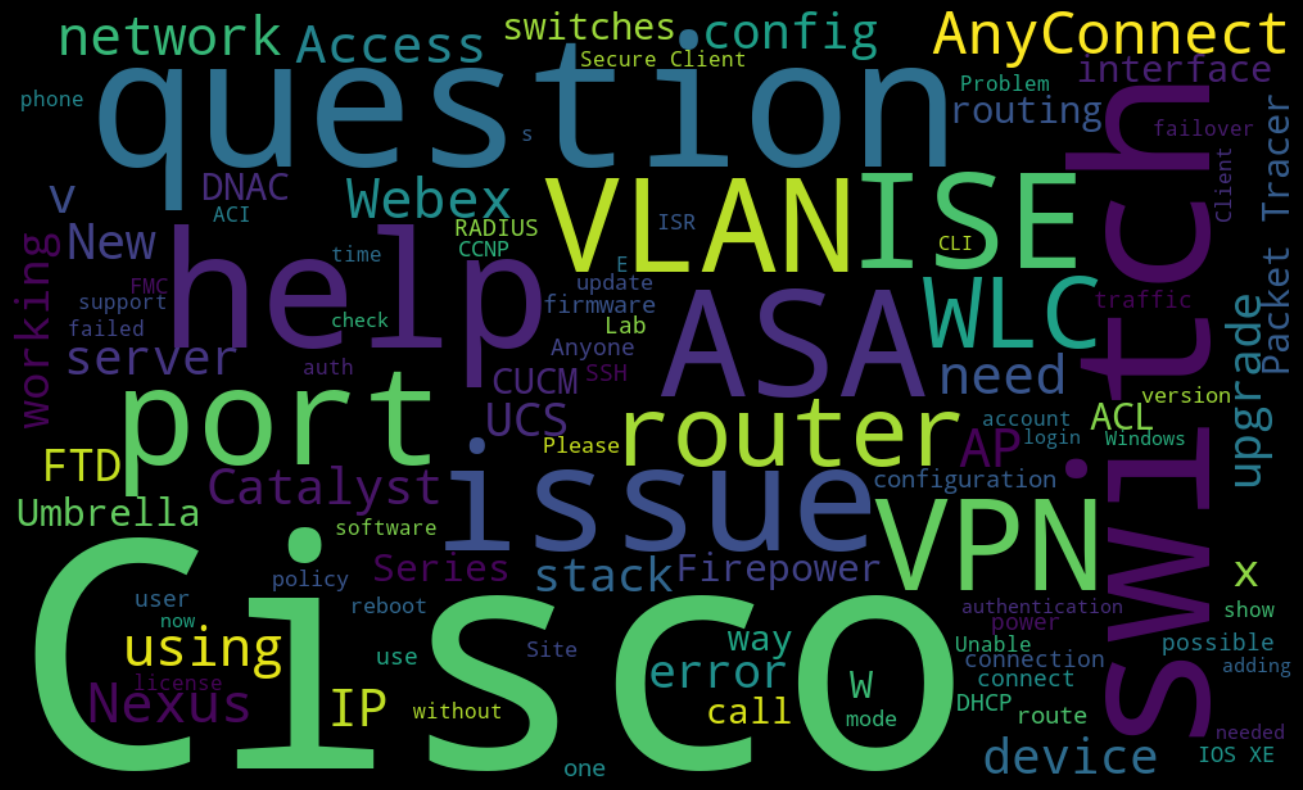

In [36]:
text = ' '.join( [twts for twts in cisco_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");